In [1]:
import numpy as np
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
#from xarray import open_mfadataset
import cartopy.crs as crs
import cartopy
from matplotlib.colors import LogNorm
import numpy as np
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cmocean
import matplotlib
from pathlib import Path
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show
from pyschism.mesh import Hgrid
import pyschism
from matplotlib.image import imread
import cmcrameri.cm as ccm
from matplotlib.collections import PolyCollection

print("Modules imported!")


ERROR 1: PROJ: proj_create_from_database: Open of /global/home/users/jennaisrael/.conda/envs/schimpy/share/proj failed
/global/home/users/jennaisrael/.conda/envs/schimpy/lib/python3.9/site-packages/pyschism/forcing/hycom/gofs.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


Modules imported!


In [2]:
#import Sienna's plotting library
import schism_plot_lib_07_30 as spl
import time

In [3]:
fn = "/global/scratch/users/jennaisrael/run_schism/run_16/outputs/"
run = spl.SchismOutput(output_folder=fn)


 Creating run object for results in /global/scratch/users/jennaisrael/run_schism/run_16/outputs/ ... 

Found 1434 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - zCoordinates


In [4]:
ds1 = run.Result(run, variable = "u", filenumber=50)

Loading in /global/scratch/users/jennaisrael/run_schism/run_16/outputs/horizontalVelX_50.nc
Loaded in dataset! 

<xarray.Dataset> Size: 1GB
Dimensions:         (time: 48, nSCHISM_hgrid_node: 305834,
                     nSCHISM_vgrid_layers: 23)
Coordinates:
  * time            (time) float64 384B 4.235e+06 4.237e+06 ... 4.32e+06
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    horizontalVelX  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...
TIME [4235400. 4237200. 4239000. 4240800. 4242600. 4244400. 4246200. 4248000.
 4249800. 4251600. 4253400. 4255200. 4257000. 4258800. 4260600. 4262400.
 4264200. 4266000. 4267800. 4269600. 4271400. 4273200. 4275000. 4276800.
 4278600. 4280400. 4282200. 4284000. 4285800. 4287600. 4289400. 4291200.
 4293000. 4294800. 4296600. 4298400. 4300200. 4302000. 4303800. 4305600.
 4307400. 4309200. 4311000. 4312800. 4314600. 4316400. 4318200. 4320000.]


In [5]:
ds2 = run.Result(run, variable = "v", filenumber=50)

Loading in /global/scratch/users/jennaisrael/run_schism/run_16/outputs/horizontalVelY_50.nc
Loaded in dataset! 

<xarray.Dataset> Size: 1GB
Dimensions:         (time: 48, nSCHISM_hgrid_node: 305834,
                     nSCHISM_vgrid_layers: 23)
Coordinates:
  * time            (time) float64 384B 4.235e+06 4.237e+06 ... 4.32e+06
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    horizontalVelY  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...
TIME [4235400. 4237200. 4239000. 4240800. 4242600. 4244400. 4246200. 4248000.
 4249800. 4251600. 4253400. 4255200. 4257000. 4258800. 4260600. 4262400.
 4264200. 4266000. 4267800. 4269600. 4271400. 4273200. 4275000. 4276800.
 4278600. 4280400. 4282200. 4284000. 4285800. 4287600. 4289400. 4291200.
 4293000. 4294800. 4296600. 4298400. 4300200. 4302000. 4303800. 4305600.
 4307400. 4309200. 4311000. 4312800. 4314600. 4316400. 4318200. 4320000.]


In [6]:
# ds1['horizontalVelX']

In [19]:
xlen = ds1.dataset['horizontalVelX'][0]
print(xlen)
ylen = ds2.dataset['horizontalVelY'][0]
print(ylen)
# ylen = ds2.isel(time=4235400)
mag = (xlen**2+ylen**2)**(1/2)
print(mag)

<xarray.DataArray 'horizontalVelX' (nSCHISM_hgrid_node: 305834,
                                    nSCHISM_vgrid_layers: 23)> Size: 28MB
array([[     nan,      nan,      nan, ..., 0.666763, 0.666348, 0.666152],
       [     nan,      nan,      nan, ..., 0.767573, 0.768543, 0.76879 ],
       [     nan,      nan,      nan, ..., 0.689211, 0.68928 , 0.689273],
       ...,
       [     nan,      nan,      nan, ..., 0.044813, 0.04482 , 0.044821],
       [     nan,      nan,      nan, ..., 0.041224, 0.041203, 0.041196],
       [     nan,      nan,      nan, ..., 0.043218, 0.043223, 0.043222]],
      dtype=float32)
Coordinates:
    time     float64 8B 4.235e+06
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Attributes:
    i23d:     2
<xarray.DataArray 'horizontalVelY' (nSCHISM_hgrid_node: 305834,
                                    nSCHISM_vgrid_layers: 23)> Size: 28MB
[7034182 values with dtype=float32]
Coordinates:
    time     float64 8B 4.235e+06
Dimensions with

Taking temporal average ... 
[4235400. 4237200. 4239000. 4240800. 4242600. 4244400. 4246200. 4248000.
 4249800. 4251600. 4253400. 4255200. 4257000. 4258800. 4260600. 4262400.
 4264200. 4266000. 4267800. 4269600. 4271400. 4273200. 4275000. 4276800.
 4278600. 4280400. 4282200. 4284000. 4285800. 4287600. 4289400. 4291200.
 4293000. 4294800. 4296600. 4298400. 4300200. 4302000. 4303800. 4305600.
 4307400. 4309200. 4311000. 4312800. 4314600. 4316400. 4318200. 4320000.]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Taking depth average ... 
Loaded in hgrid.gr3 file...

Domain = Bay-Delta
Domain options: SSC, Delta, South_Delta, Bay_Delta
/global/scratch/users/jennaisrael/Plotting
Saved velx_50_Bay_Delta.png.




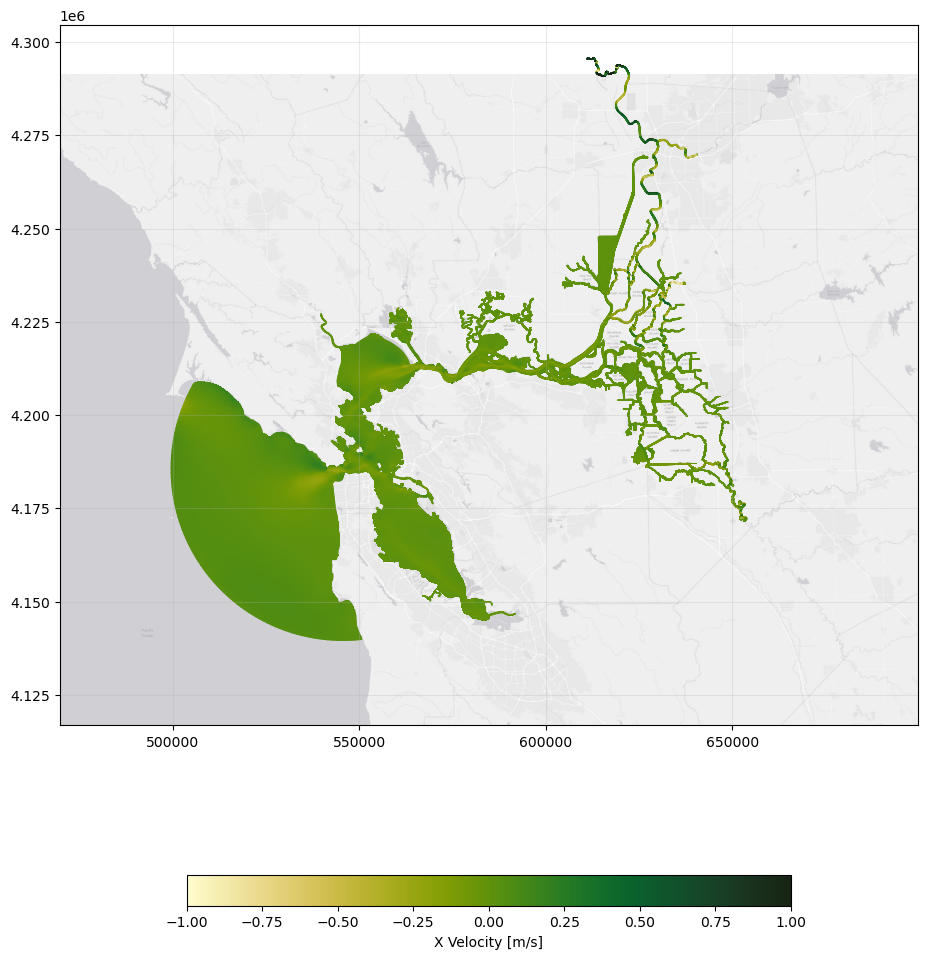

In [8]:
titlestr1="velx_50_Bay_Delta"
fig1, ax1 = ds1.plot_variable(run, domain="Bay-Delta", time="average",depth= "average",titlestr=titlestr1)

In [13]:
ds1.dataset

<xarray.Dataset> Size: 1GB
Dimensions:         (time: 48, nSCHISM_hgrid_node: 305834,
                     nSCHISM_vgrid_layers: 23)
Coordinates:
  * time            (time) float64 384B 4.235e+06 4.237e+06 ... 4.32e+06
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    horizontalVelX  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...

In [9]:
# titlestr2="vely_50"
# fig1, ax1 = ds2.plot_variable(run, domain="Delta", time="average",depth= "average",titlestr=titlestr2)

In [8]:
#use this as a base object for the grid
ds = run.Result(run, variable = "salinity", filenumber=50)

Loading in /global/scratch/users/jennaisrael/run_schism/run_16/outputs/salinity_50.nc
Loaded in dataset! 

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 4.235e+06 4.237e+06 ... 4.318e+06 4.32e+06
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...
TIME [4235400. 4237200. 4239000. 4240800. 4242600. 4244400. 4246200. 4248000.
 4249800. 4251600. 4253400. 4255200. 4257000. 4258800. 4260600. 4262400.
 4264200. 4266000. 4267800. 4269600. 4271400. 4273200. 4275000. 4276800.
 4278600. 4280400. 4282200. 4284000. 4285800. 4287600. 4289400. 4291200.
 4293000. 4294800. 4296600. 4298400. 4300200. 4302000. 4303800. 4305600.
 4307400. 4309200. 4311000. 4312800. 4314600. 4316400. 4318200. 4320000.]


In [9]:
#read in aggregated netcdfs 
basenc=xr.open_dataset("./base_salinity_depth_averaged.nc")
incrnc=xr.open_dataset("./increased_salinity_depth_averaged.nc")
decrnc=xr.open_dataset("./decreased_salinity_depth_averaged.nc")

In [10]:
#take difference from base
incrdiff=incrnc.salinity-basenc.salinity
decrdiff=decrnc.salinity-basenc.salinity

In [11]:
#when is the difference the largest?
incrdiff.argmax()

<xarray.DataArray 'salinity' ()> Size: 8B
array(475662302)

In [12]:
incrdiff.idxmax(dim='time')

<xarray.DataArray 'time' (nSCHISM_hgrid_node: 305834)> Size: 2MB
array([7833600., 7833600., 7833600., ..., 2392200., 2392200., 2392200.])
Dimensions without coordinates: nSCHISM_hgrid_node

In [13]:
incrdiff.min()

<xarray.DataArray 'salinity' ()> Size: 4B
array(-5.8139114, dtype=float32)

In [14]:
incrdiff.max()

<xarray.DataArray 'salinity' ()> Size: 4B
array(3.6955671, dtype=float32)

In [15]:
decrdiff.min()

<xarray.DataArray 'salinity' ()> Size: 4B
array(-5.838936, dtype=float32)

In [16]:
decrdiff.max()

<xarray.DataArray 'salinity' ()> Size: 4B
array(4.8475614, dtype=float32)

In [17]:
basenc.salinity.max()

<xarray.DataArray 'salinity' ()> Size: 4B
array(33.53503, dtype=float32)

In [18]:
incrnc.salinity.max()

<xarray.DataArray 'salinity' ()> Size: 4B
array(33.534863, dtype=float32)

In [19]:
decrnc.salinity.max()

<xarray.DataArray 'salinity' ()> Size: 4B
array(33.534725, dtype=float32)

In [20]:
#overwrite dataset object and rename
ds.dataset=incrdiff

In [21]:
values = ds.time_average(ds.dataset)


In [22]:
print(values)

<xarray.DataArray 'salinity' (nSCHISM_hgrid_node: 305834)> Size: 1MB
array([ 2.6779789e-10,  3.8378678e-10,  1.4498612e-10, ...,
       -8.8185670e-10, -1.2161776e-09, -1.2178833e-09], dtype=float32)
Dimensions without coordinates: nSCHISM_hgrid_node


In [23]:
ds.time_average(ds.dataset)

<xarray.DataArray 'salinity' (nSCHISM_hgrid_node: 305834)> Size: 1MB
array([ 2.6779789e-10,  3.8378678e-10,  1.4498612e-10, ...,
       -8.8185670e-10, -1.2161776e-09, -1.2178833e-09], dtype=float32)
Dimensions without coordinates: nSCHISM_hgrid_node

In [24]:
ds.time_average(ds.dataset).min()

<xarray.DataArray 'salinity' ()> Size: 4B
array(-0.17881033, dtype=float32)

Taking temporal average ... 
[1.8000e+03 3.6000e+03 5.4000e+03 ... 7.8588e+06 7.8606e+06 7.8624e+06]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Data already depth averaged ... 
Domain = Bay-Delta
Domain options: SSC, Delta, South_Delta, Bay_Delta
/global/scratch/users/jennaisrael/Plotting
Saved increased_pumping_diff_flip_cbar.png.




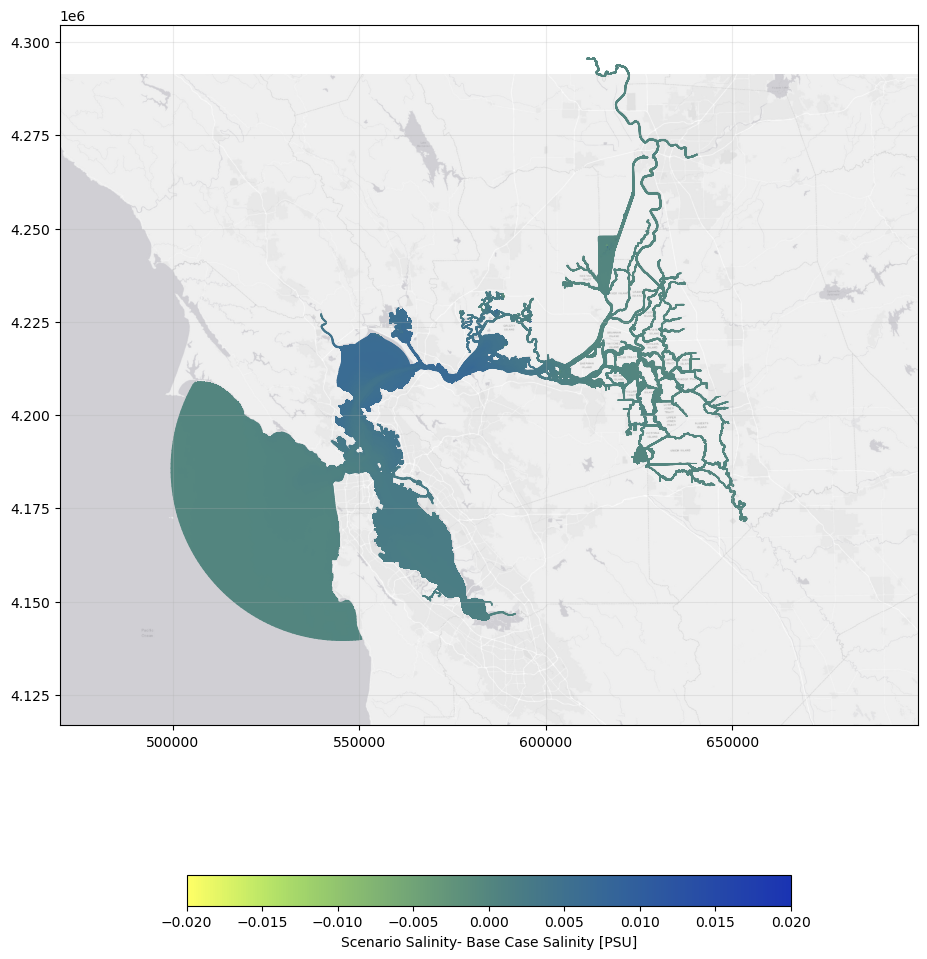

In [25]:
titlestr1="increased_pumping_diff_flip_cbar"
fig1, ax1 = ds.plot_variable(run, domain="Bay-Delta", time="average",depth= "already averaged",titlestr=titlestr1)

In [26]:
#overwrite dataset object and rename
ds.dataset=decrdiff

Taking temporal average ... 
[1.8000e+03 3.6000e+03 5.4000e+03 ... 7.8588e+06 7.8606e+06 7.8624e+06]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Data already depth averaged ... 
Domain = Bay-Delta
Domain options: SSC, Delta, South_Delta, Bay_Delta
/global/scratch/users/jennaisrael/Plotting
Saved decreased_pumping_diff_flip_cbar.png.




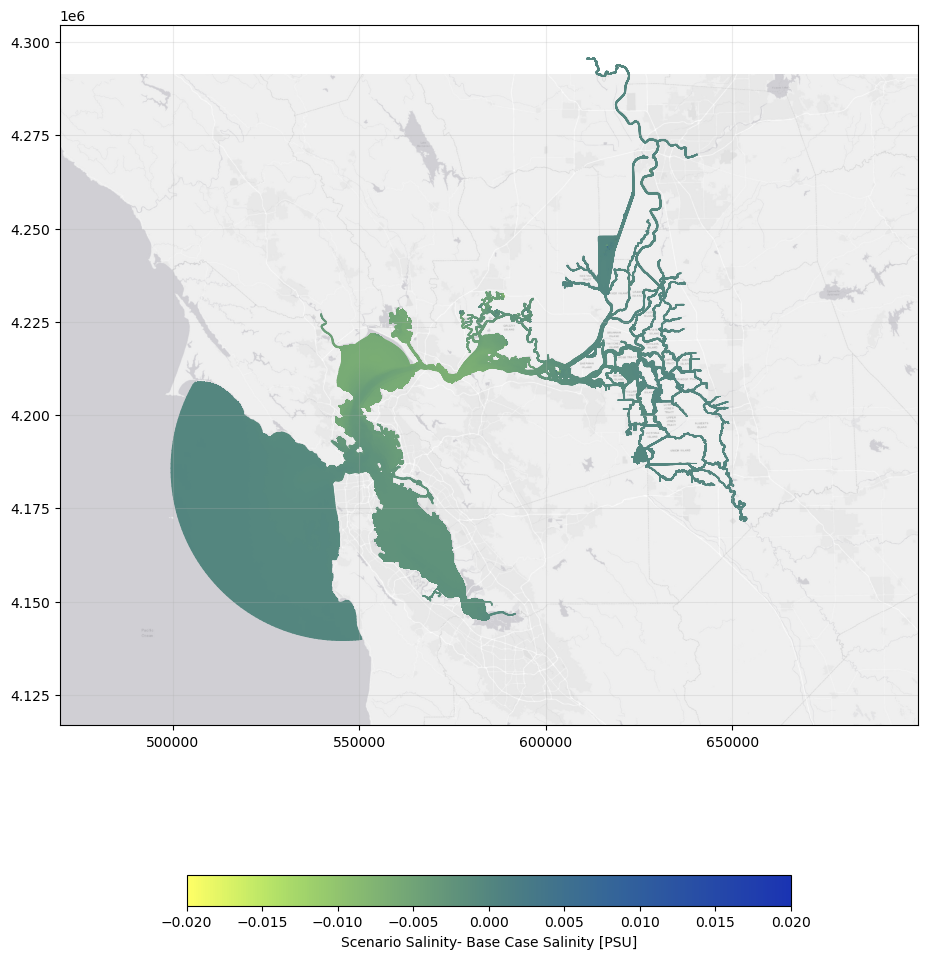

In [27]:
titlestr2="decreased_pumping_diff_flip_cbar"
fig1, ax1 = ds.plot_variable(run, domain="Bay-Delta", time="average",depth= "already averaged",titlestr=titlestr2)

In [ ]:
#plot time series at Emmaton for base case, increased pumping, and decreased pumping
#read the CSVs
#plot the time series


In [ ]:
run.hgrid.quads

In [ ]:
#overwrite dataset object and rename
ds.dataset=decrdiff

In [ ]:
titlestr2="decreased_pumping_diff"
fig2, ax2 = ds.plot_variable(run, domain="Bay-Delta", time="average", depth="already averaged",title)

In [ ]:
#those seem wrong try just plotting the increased 